In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import pandas as pd
#import pandas_datareader.data as web
from datetime import datetime, date, timedelta
import datetime as dt
import time
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from numpy import absolute
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBRegressor
import os
from LSTMModel import *
from XGBoostModel import *
import LSTMModel
import XGBoostModel
import ARIMAModel

In [2]:
stockNo = '3711.TW'

#TrainDateStart = '2003-06-30'   #0050
#TrainDateStart = '1994-09-05'    #2330
#TrainDateStart = '2001-07-23'    #2454
#TrainDateStart = '1985-07-16'    #2303
TrainDateStart = '2018-04-30'    #3711
TrainDateEnd = '2023-01-01'
year = 2023
month = 1
day = 1

date_actual, LSTMdate_predict, actual_price, LSTM_predict = LSTMModel.Model(stockNo, TrainDateStart, TrainDateEnd, TrainDateEnd, year, month, day)
date_actual, XGBoostdate_predict, actual_price, XGBoost_predict = XGBoostModel.Model(stockNo, TrainDateStart, TrainDateEnd, TrainDateEnd, year, month, day)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/25
27/27 [==============================] - 2s 13ms/step - loss: 0.0436 - mean_squared_error: 0.0436 - mean_absolute_error: 0.1442 - val_loss: 0.0087 - val_mean_squared_error: 0.0087 - val_mean_absolute_error: 0.0820
Epoch 2/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0629 - val_loss: 0.0034 - val_mean_squared_error: 0.0034 - val_mean_absolute_error: 0.0439
Epoch 3/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - mean_absolute_error: 0.0497 - val_loss: 0.0033 - val_mean_squared_error: 0.0033 - val_mean_absolute_error: 0.0425
Epoch 4/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - mean_absolute_error: 0.0494 - val_loss: 0.0033 - val_mean_squared_error: 0.0033

In [3]:
ARIMA_predict = ARIMAModel.Model(stockNo, TrainDateStart, TrainDateEnd, TrainDateEnd, year, month, day)

[*********************100%***********************]  1 of 1 completed


In [3]:
print("actual_price --> ", len(actual_price))
print("LSTM_Predict --> ", len(LSTM_predict))
#print(len(XGBoost_predict))
print("date_actual --> ", len(date_actual))
print("LSTMdate_predict --> ", len(LSTMdate_predict))
print(date_actual)
print(type(date_actual[0]))

print("================================================")
print("actual_price --> ", len(actual_price))
print("XGBoost_Predict --> ", len(XGBoost_predict))
#print(len(XGBoost_predict))
print("date_actual --> ", len(date_actual))
print("XGBoostdate_predict --> ", len(XGBoostdate_predict))


actual_price -->  240
LSTM_Predict -->  250
date_actual -->  240
LSTMdate_predict -->  250
[datetime.date(2023, 1, 3), datetime.date(2023, 1, 4), datetime.date(2023, 1, 5), datetime.date(2023, 1, 6), datetime.date(2023, 1, 9), datetime.date(2023, 1, 10), datetime.date(2023, 1, 11), datetime.date(2023, 1, 12), datetime.date(2023, 1, 13), datetime.date(2023, 1, 16), datetime.date(2023, 1, 17), datetime.date(2023, 1, 30), datetime.date(2023, 1, 31), datetime.date(2023, 2, 1), datetime.date(2023, 2, 2), datetime.date(2023, 2, 3), datetime.date(2023, 2, 6), datetime.date(2023, 2, 7), datetime.date(2023, 2, 8), datetime.date(2023, 2, 9), datetime.date(2023, 2, 10), datetime.date(2023, 2, 13), datetime.date(2023, 2, 14), datetime.date(2023, 2, 15), datetime.date(2023, 2, 16), datetime.date(2023, 2, 17), datetime.date(2023, 2, 20), datetime.date(2023, 2, 21), datetime.date(2023, 2, 22), datetime.date(2023, 2, 23), datetime.date(2023, 2, 24), datetime.date(2023, 3, 1), datetime.date(2023, 3, 2)

In [4]:
date_actual_10 = date_actual[len(date_actual)-10:]
actual_price_10 = actual_price[len(actual_price)-10:]
LSTMdate_predict_10 = LSTMdate_predict[len(LSTMdate_predict)-10:]
LSTM_predict_10 = LSTM_predict[len(LSTM_predict)-10:]
XGBoostdate_predict_10 = XGBoostdate_predict[len(XGBoostdate_predict)-10:]
XGBoost_predict_10 = XGBoost_predict[len(XGBoost_predict)-10:]
ARIMAdate_predict_10 = XGBoostdate_predict[len(XGBoostdate_predict)-10:]
ARIMA_predict_10 = ARIMA_predict[len(ARIMA_predict)-10:]

In [5]:
print(len(date_actual_10))
print(len(actual_price_10))
print(len(LSTMdate_predict_10))
print(len(LSTM_predict_10))
print(len(XGBoostdate_predict_10))
print(len(XGBoost_predict_10))

10
10
10
10
10
10


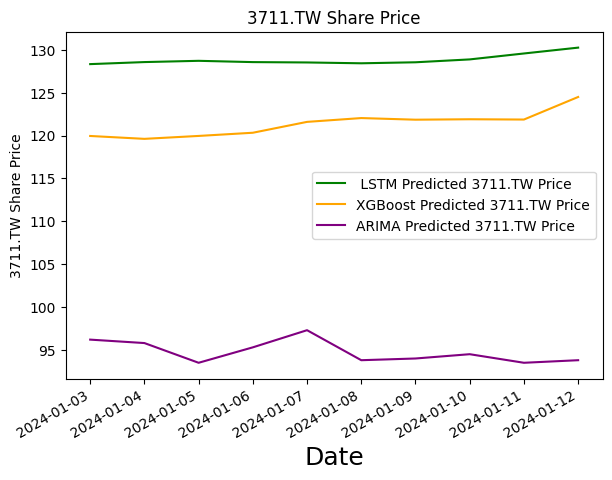

In [5]:
#plt.plot(date_actual, actual_price, color = 'black', label = f'Actual {stockNo} Price')
#plt.plot(LSTMdate_predict, LSTM_predict, color = 'green', label = f' LSTM Predicted {stockNo} Price')
#plt.plot(XGBoostdate_predict, XGBoost_predict, color = 'orange', label = f'XGBoost Predicted {stockNo} Price')

#plt.plot(date_actual_10, actual_price_10, color = 'black', label = f'Actual {stockNo} Price')
plt.plot(LSTMdate_predict_10, LSTM_predict_10, color = 'green', label = f' LSTM Predicted {stockNo} Price')
plt.plot(XGBoostdate_predict_10, XGBoost_predict_10, color = 'orange', label = f'XGBoost Predicted {stockNo} Price')
plt.plot(XGBoostdate_predict_10, ARIMA_predict_10, color = 'purple', label = f'ARIMA Predicted {stockNo} Price')
plt.title(f'{stockNo} Share Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel(f'{stockNo} Share Price')
plt.tight_layout()
plt.legend()
plt.gcf().autofmt_xdate()
#plt.savefig('./Final Result/{}.png'.format(stockNo))
plt.show()